# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">1.4 RGB Coding</span>

In [4]:
import cv2 # install opencv-python
# Read the image
img = cv2.imread("Meduse.jpg")

# Convert into grey-level
# Grey-scale transformation is the function that takes as input a grey-scale value of a pixel of an image 
# and gives as ouput a new grey-scale value for that pixel. 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# cv2.imshow('img_gray', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Display some pixels
print(img[200,400])
print(img_gray[200,400])
print(img[400,200])
print(img_gray[400,200])

[88 19  0]
21
[ 29 143 206]
149


# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">2.3 Histogram equalization - Example</span>

Min and max values of the grey-scale image:
103
174


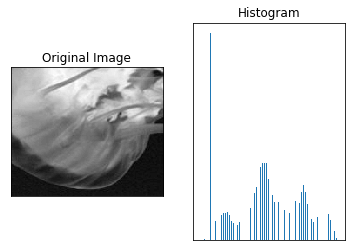

In [2]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

img = cv2.imread('Meduse_degrade.jpg',cv2.IMREAD_GRAYSCALE)
#-----------------------------
# Print min and max pixel values of the image
print('Min and max values of the grey-scale image:')
print(np.min(img))
print(np.max(img))

#-----------------------------
# Histogram of the image
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.hist(img.ravel(), bins=256)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.show()

# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">2.3 Histogram equalization - Solution</span>

Min and max values of the grey-scale image:
103
174
Min and max values of the equalized image
0.009723917022574741
255.0


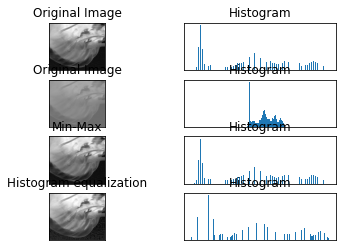

In [5]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

img = cv2.imread('Meduse_degrade.jpg',cv2.IMREAD_GRAYSCALE)
#-----------------------------
# Print min and max pixel values of the image
print('Min and max values of the grey-scale image:')
print(np.min(img))
print(np.max(img))

#-----------------------------
# Image histogram
plt.subplot(421),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(422),plt.hist(img.ravel(), bins=256)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])

#-----------------------------
# Real image histogram (not automatically modified by matplotlib when plotting)
img2 = deepcopy(img); #.copy();
img2[0,0]=0 # premier pixel noir
img2[0,1]=255 # second pixel blanc
plt.subplot(423),plt.imshow(img2, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(424),plt.hist(img2.ravel(),256);
plt.title('Histogram'), plt.xticks([]), plt.yticks([])

#-----------------------------
# Min-Max
img_minmax = deepcopy(img);
val_min = np.min(img)
val_max = np.max(img)
coef = 1.0*255/(val_max-val_min);
img_minmax = (img_minmax-val_min)*coef;
img_minmax[0,0]=0
img_minmax[0,1]=255
plt.subplot(425),plt.imshow(img_minmax, cmap = 'gray')
plt.title('Min-Max'), plt.xticks([]), plt.yticks([])
plt.subplot(426),plt.hist(img_minmax.ravel(),256);
plt.title('Histogram'), plt.xticks([]), plt.yticks([])

#-----------------------------
# Histogram equalization
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum() # compute cumulative histogram
cdf = (cdf)*255/(cdf.max()) # normalization betweeen 0 and 255
img_egalisee = cdf[img] # replace the values in the image

print('Min and max values of the equalized image')
print(np.min(img_egalisee))
print(np.max(img_egalisee))
img_egalisee[0,0]=0
img_egalisee[0,1]=255

plt.subplot(427),plt.imshow(img_egalisee, cmap = 'gray')
plt.title('Histogram equalization'), plt.xticks([]), plt.yticks([])
plt.subplot(428),plt.hist(img_egalisee.ravel(),256,[0,256]);
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('..\Data\Meduse_egalisee.jpg', img_egalisee)
cv2.destroyAllWindows()



